## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.35, 0.45]
Num_Neurons_EXP = [[512, 256, 128], [512, 256, 128, 64, 32, 16, 8, 4, 2]]

In [7]:
results = {}

for num_neuron in Num_Neurons_EXP:
    for drp in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(num_neuron)
        print("Experiment with Dropout = %.6f" % (drp))
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neuron, drp_ratio=drp)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "%d-layers-drp_%s" % (len(num_neuron), str(drp))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


[512, 256, 128]
Experiment with Dropout = 0.250000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_

50000/50000 [==============================] - 22s 444us/step - loss: 1.4663 - accuracy: 0.4763 - val_loss: 1.4111 - val_accuracy: 0.4921
Epoch 40/50
50000/50000 [==============================] - 26s 521us/step - loss: 1.4604 - accuracy: 0.4784 - val_loss: 1.4047 - val_accuracy: 0.4992
Epoch 41/50
50000/50000 [==============================] - 24s 489us/step - loss: 1.4521 - accuracy: 0.4833 - val_loss: 1.3895 - val_accuracy: 0.5017
Epoch 42/50
50000/50000 [==============================] - 23s 458us/step - loss: 1.4418 - accuracy: 0.4862 - val_loss: 1.3815 - val_accuracy: 0.5044
Epoch 43/50
50000/50000 [==============================] - 23s 461us/step - loss: 1.4358 - accuracy: 0.4866 - val_loss: 1.3838 - val_accuracy: 0.5087
Epoch 44/50
50000/50000 [==============================] - 23s 456us/step - loss: 1.4350 - accuracy: 0.4851 - val_loss: 1.3823 - val_accuracy: 0.5061
Epoch 45/50
50000/50000 [==============================] - 22s 448us/step - loss: 1.4277 - accuracy: 0.4915 - va

Epoch 17/50
50000/50000 [==============================] - 22s 433us/step - loss: 2.2158 - accuracy: 0.1453 - val_loss: 2.1318 - val_accuracy: 0.1828
Epoch 18/50
50000/50000 [==============================] - 24s 470us/step - loss: 2.2157 - accuracy: 0.1454 - val_loss: 2.1303 - val_accuracy: 0.1801
Epoch 19/50
50000/50000 [==============================] - 24s 470us/step - loss: 2.2103 - accuracy: 0.1468 - val_loss: 2.1152 - val_accuracy: 0.1860
Epoch 20/50
50000/50000 [==============================] - 23s 453us/step - loss: 2.2028 - accuracy: 0.1490 - val_loss: 2.1217 - val_accuracy: 0.1785
Epoch 21/50
50000/50000 [==============================] - 23s 460us/step - loss: 2.1986 - accuracy: 0.1495 - val_loss: 2.1045 - val_accuracy: 0.1771
Epoch 22/50
50000/50000 [==============================] - 23s 455us/step - loss: 2.1943 - accuracy: 0.1459 - val_loss: 2.1015 - val_accuracy: 0.1729
Epoch 23/50
50000/50000 [==============================] - 24s 476us/step - loss: 2.1930 - accuracy:

50000/50000 [==============================] - 25s 495us/step - loss: 2.3102 - accuracy: 0.1018 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 23s 470us/step - loss: 2.3032 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 23s 457us/step - loss: 2.3026 - accuracy: 0.1018 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 23s 459us/step - loss: 2.3022 - accuracy: 0.1035 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 23s 464us/step - loss: 2.3021 - accuracy: 0.1035 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 23s 450us/step - loss: 2.3020 - accuracy: 0.1040 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 22s 448us/step - loss: 2.3019 - accuracy: 0.1050 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 427us/step - loss: 2.3216 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 20s 409us/step - loss: 2.3030 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 21s 415us/step - loss: 2.3032 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 21s 411us/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 21s 416us/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 20s 409us/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] 

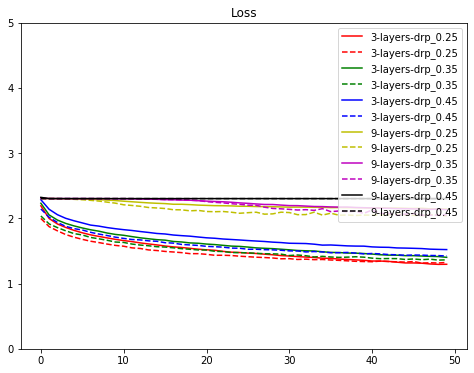

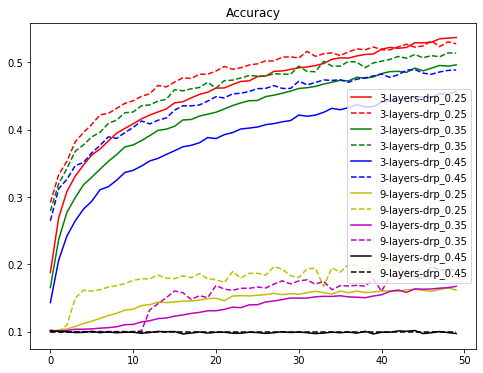

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
# 愈少層並且 dropout 愈低的結果愈理想

# 改用 Adam

In [10]:
results = {}

for num_neuron in Num_Neurons_EXP:
    for drp in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(num_neuron)
        print("Experiment with Dropout = %.6f" % (drp))
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neuron, drp_ratio=drp)
        model.summary()
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "%d-layers-drp_%s" % (len(num_neuron), str(drp))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


[512, 256, 128]
Experiment with Dropout = 0.250000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_

50000/50000 [==============================] - 26s 520us/step - loss: 1.5157 - accuracy: 0.4557 - val_loss: 1.4549 - val_accuracy: 0.4878
Epoch 46/50
50000/50000 [==============================] - 26s 515us/step - loss: 1.5132 - accuracy: 0.4567 - val_loss: 1.4776 - val_accuracy: 0.4770
Epoch 47/50
50000/50000 [==============================] - 26s 519us/step - loss: 1.5123 - accuracy: 0.4570 - val_loss: 1.4712 - val_accuracy: 0.4802
Epoch 48/50
50000/50000 [==============================] - 26s 516us/step - loss: 1.5078 - accuracy: 0.4619 - val_loss: 1.4902 - val_accuracy: 0.4728
Epoch 49/50
50000/50000 [==============================] - 27s 530us/step - loss: 1.5055 - accuracy: 0.4622 - val_loss: 1.4728 - val_accuracy: 0.4832
Epoch 50/50
50000/50000 [==============================] - 26s 518us/step - loss: 1.5028 - accuracy: 0.4608 - val_loss: 1.4844 - val_accuracy: 0.4755
[512, 256, 128]
Experiment with Dropout = 0.350000
Model: "model_1"
____________________________________________

50000/50000 [==============================] - 27s 539us/step - loss: 1.7017 - accuracy: 0.3844 - val_loss: 1.6576 - val_accuracy: 0.4239
Epoch 40/50
50000/50000 [==============================] - 27s 530us/step - loss: 1.6980 - accuracy: 0.3851 - val_loss: 1.6406 - val_accuracy: 0.4317
Epoch 41/50
50000/50000 [==============================] - 27s 540us/step - loss: 1.6923 - accuracy: 0.3852 - val_loss: 1.6789 - val_accuracy: 0.4174
Epoch 42/50
50000/50000 [==============================] - 27s 549us/step - loss: 1.6891 - accuracy: 0.3900 - val_loss: 1.6734 - val_accuracy: 0.4134
Epoch 43/50
50000/50000 [==============================] - 27s 545us/step - loss: 1.6940 - accuracy: 0.3880 - val_loss: 1.6540 - val_accuracy: 0.4337
Epoch 44/50
50000/50000 [==============================] - 27s 543us/step - loss: 1.6834 - accuracy: 0.3891 - val_loss: 1.6589 - val_accuracy: 0.4183
Epoch 45/50
50000/50000 [==============================] - 27s 535us/step - loss: 1.6879 - accuracy: 0.3929 - va

50000/50000 [==============================] - 24s 483us/step - loss: 1.8776 - accuracy: 0.3063 - val_loss: 1.8947 - val_accuracy: 0.3297
Epoch 34/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.8753 - accuracy: 0.3055 - val_loss: 1.8576 - val_accuracy: 0.3398
Epoch 35/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.8720 - accuracy: 0.3070 - val_loss: 1.9022 - val_accuracy: 0.3154
Epoch 36/50
50000/50000 [==============================] - 25s 494us/step - loss: 1.8754 - accuracy: 0.3048 - val_loss: 1.8844 - val_accuracy: 0.3304
Epoch 37/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.8770 - accuracy: 0.3047 - val_loss: 1.8964 - val_accuracy: 0.3396
Epoch 38/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.8721 - accuracy: 0.3086 - val_loss: 1.9223 - val_accuracy: 0.3249
Epoch 39/50
50000/50000 [==============================] - 24s 482us/step - loss: 1.8673 - accuracy: 0.3066 - va

Epoch 17/50
50000/50000 [==============================] - 25s 495us/step - loss: 2.1457 - accuracy: 0.1658 - val_loss: 2.1532 - val_accuracy: 0.1631
Epoch 18/50
50000/50000 [==============================] - 25s 494us/step - loss: 2.1385 - accuracy: 0.1666 - val_loss: 2.1403 - val_accuracy: 0.1601
Epoch 19/50
50000/50000 [==============================] - 25s 500us/step - loss: 2.1393 - accuracy: 0.1658 - val_loss: 2.1041 - val_accuracy: 0.1739
Epoch 20/50
50000/50000 [==============================] - 25s 494us/step - loss: 2.1405 - accuracy: 0.1649 - val_loss: 2.1357 - val_accuracy: 0.1614
Epoch 21/50
50000/50000 [==============================] - 25s 501us/step - loss: 2.1434 - accuracy: 0.1668 - val_loss: 2.1546 - val_accuracy: 0.1517
Epoch 22/50
50000/50000 [==============================] - 25s 502us/step - loss: 2.1369 - accuracy: 0.1676 - val_loss: 2.1072 - val_accuracy: 0.1754
Epoch 23/50
50000/50000 [==============================] - 25s 502us/step - loss: 2.1377 - accuracy:

50000/50000 [==============================] - 25s 509us/step - loss: 2.3076 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 24s 488us/step - loss: 2.3030 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 25s 493us/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 24s 487us/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 24s 487us/step - loss: 2.3027 - accuracy: 0.0958 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 24s 485us/step - loss: 2.3027 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 24s 487us/step - loss: 2.3028 - accuracy: 0.0971 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 27s 543us/step - loss: 2.3304 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 27s 537us/step - loss: 2.3043 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 27s 549us/step - loss: 2.3028 - accuracy: 0.0956 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 27s 541us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 27s 532us/step - loss: 2.3028 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 27s 530us/step - loss: 2.3029 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] 

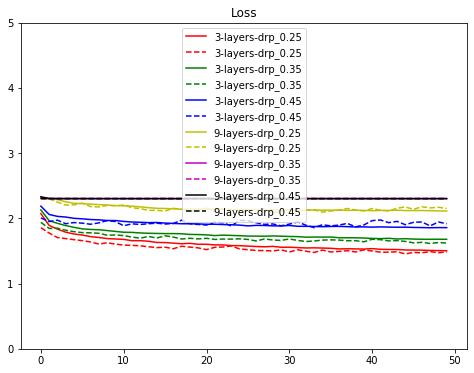

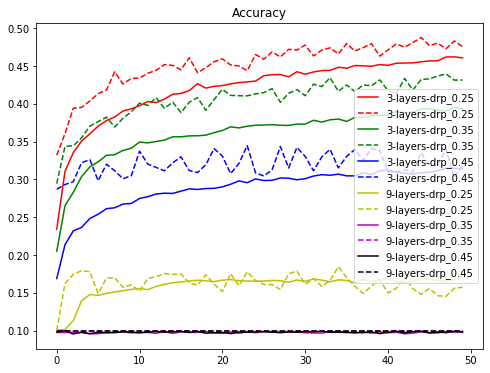

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()